# A. Pandas ile Veri Analizi (55 puan)
---

**Açıklama:**
* Çözümlerinizde döngüler yerine ```pandas``` kütüphanesinin kullanılması gerekmektedir.

## Soru A.1 (10p):
* Kanser hastalarının klinik durumlarına ilişkin veriler içeren "clinical.tsv" dosyasını, ```cancer``` adlı DataFrame'e okuyunuz. ("'--" değerlerinin ```NaN``` olacak şekilde okunmasını sağlayınız.) 
* Tüm değerleri ```NaN``` olan sütunları siliniz.
* 'case_submitter_id', 'age_at_index', 'days_to_death', 'gender', 'race', 'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'ajcc_pathologic_stage', 'icd_10_code', 'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 'site_of_resection_or_biopsy', 'synchronous_malignancy', 'tissue_or_organ_of_origin', 'year_of_diagnosis', 'treatment_type' sütunları haricindeki sütunları siliniz.
* Sütunlarından herhangi birisinde ```NaN``` değeri olan satırları siliniz. Kaç satır silindi?
* Sütunlarından herhangi birisinde "not reported" ya da "Not Reported" değerleri olan satırları siliniz.
* Hasta barkodu (case_submitter_id) aynı olan satırlardan ilki kalacak şekilde tekrar edenleri siliniz.
* Hasta barkodu (case_submitter_id) sütununu DataFrame'in index'i yapınız.
* En son oluşan DataFrame'in satır ve sütun sayısını yazdırınız.

In [49]:
#Read the “clinical.tsv” file, which contains data on the clinical status of cancer patients, into the DataFrame named cancer. (Make sure the '--' values are read as NaN.)
import pandas as pd
import numpy as np
columns = ['case_submitter_id', 'age_at_index', 'days_to_death', 'gender', 'race', 'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'ajcc_pathologic_stage', 'icd_10_code', 'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 'site_of_resection_or_biopsy', 'synchronous_malignancy', 'tissue_or_organ_of_origin','year_of_diagnosis', 'treatment_type']
cancer = pd.read_csv('clinical.tsv', sep='\t', index_col = False, header = 0, na_values="'--")
cancer = cancer[columns]
#Delete all columns with NaN values.
cancer.dropna(axis=1, how='all', inplace=True)

#Delete rows with NaN value in any of their columns and Calculate how many rows are deleted.
before = cancer.shape[0]
cancer.dropna(axis=0, how='any', inplace=True)
after = cancer.shape[0]
print("Number of rows deleted:", before - after)

#Replace the “not reported” or “Not Reported” values in any of the columns with NaN.
cancer.replace(to_replace=["not reported", "Not Reported"], value=np.nan, inplace=True)
cancer.dropna(axis=0, how='any', inplace=True)

#Delete the duplicates so that the first of the lines with the same patient barcode (case_submitter_id) remains.
cancer.drop_duplicates(subset=['case_submitter_id'], keep='first', inplace=True)

#Make the patient barcode (case_submitter_id) column the index of the DataFrame.
cancer.set_index('case_submitter_id', inplace=True)

#Print the number of rows and columns of the last DataFrame.
print("Number of rows:", cancer.shape[0])
print("Number of columns:", cancer.shape[1])

cancer

Number of rows deleted: 16402
Number of rows: 1027
Number of columns: 18


,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,primary_diagnosis,prior_malignancy,prior_treatment,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type
case_submitter_id,,,,,,,,,,,,,,,,,,
TCGA-CV-5970,59.0,406.0,male,white,Dead,1950.0,2010.0,21890.0,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2009.0,"Radiation Therapy, NOS"
TCGA-BA-4074,69.0,462.0,male,white,Dead,1934.0,2004.0,25282.0,Stage IVA,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2003.0,"Radiation Therapy, NOS"
TCGA-CN-A642,57.0,82.0,male,white,Dead,1955.0,2012.0,21011.0,Stage IVB,C02.9,"Squamous cell carcinoma, NOS",no,No,"Tongue, NOS",No,"Tongue, NOS",2012.0,"Radiation Therapy, NOS"
TCGA-2J-AABA,55.0,607.0,male,white,Dead,1957.0,2013.0,20133.0,Stage IIB,C25.0,"Infiltrating duct carcinoma, NOS",no,No,Head of pancreas,No,Head of pancreas,2012.0,"Radiation Therapy, NOS"
TCGA-62-8398,55.0,444.0,male,white,Dead,1952.0,2008.0,20197.0,Stage IIIA,C34.3,Adenocarcinoma with mixed subtypes,no,No,"Lower lobe, lung",No,"Lower lobe, lung",2007.0,"Pharmaceutical Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-3A-A9IZ,47.0,308.0,male,white,Dead,1965.0,2012.0,17294.0,Stage IIB,C25.0,"Infiltrating duct carcinoma, NOS",no,No,Head of pancreas,No,Head of pancreas,2012.0,"Radiation Therapy, NOS"
TCGA-R5-A7ZF,65.0,259.0,female,black or african american,Dead,1947.0,2012.0,23908.0,Stage IV,C16.3,"Adenocarcinoma, intestinal type",no,No,Gastric antrum,No,Gastric antrum,2012.0,"Radiation Therapy, NOS"
TCGA-SC-A6LM,64.0,881.0,female,white,Dead,1946.0,2012.0,23400.0,Stage IV,C45.0,"Epithelioid mesothelioma, malignant",no,No,"Pleura, NOS",No,"Pleura, NOS",2010.0,"Pharmaceutical Therapy, NOS"


## Soru A.2 (10p):


* En az 10 hasta içeren birincil tanı (primary_diagnosis) kanser türlerinin cinsiyete göre dağılımını, yatay yığılmış (stacked) sütun grafik olarak gösteriniz.

Text(0.5, 1.0, 'Primary diagnosis by gender')

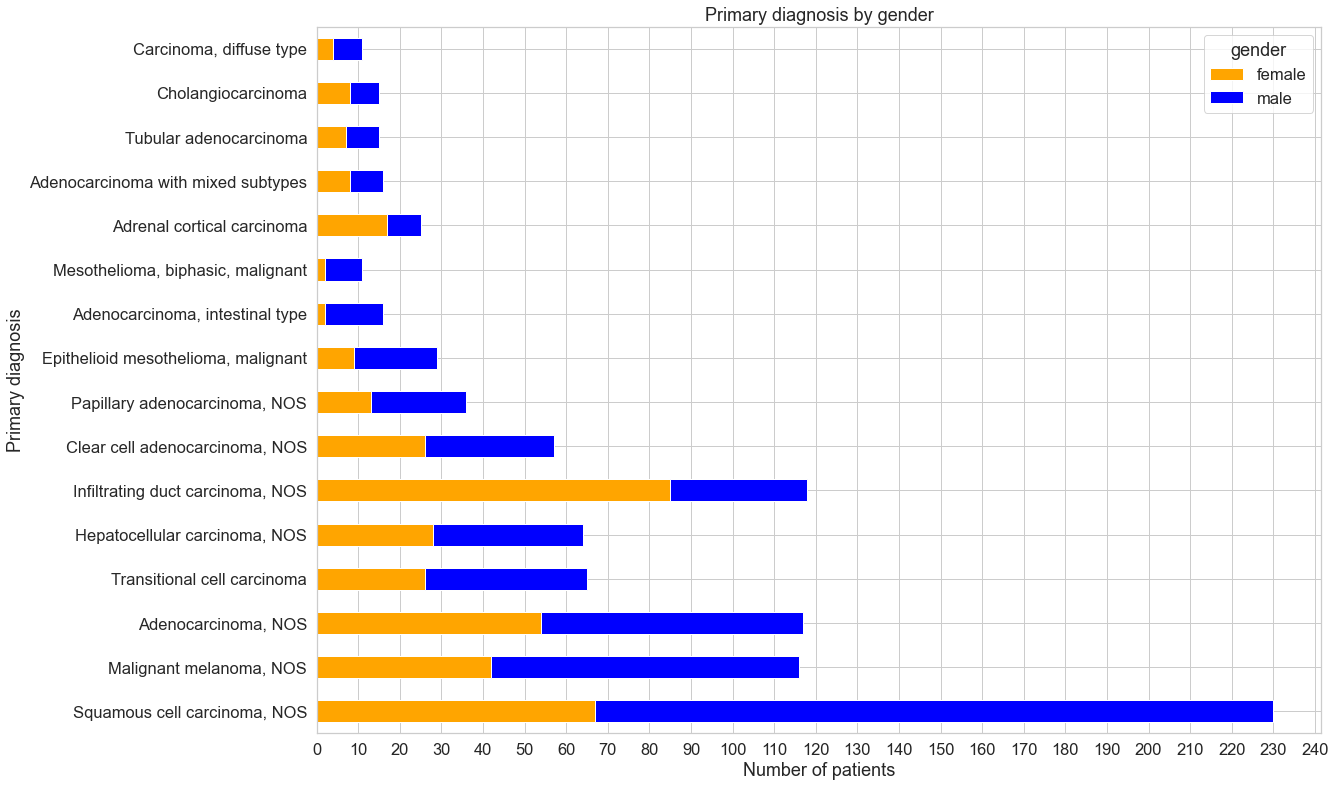

In [50]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = cancer.groupby(['primary_diagnosis', 'gender']).gender.count().unstack().sort_values(["male", "female"], axis=0,
                                                                                               ascending=[False,False]).head(16)
fig, ax = plt.subplots()

ax.ticklabel_format(style="plain")
df_plot.plot(kind='barh', stacked=True, color=['orange', 'blue'], figsize=(18, 13),
             rot=0.00000000000001, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel('Number of patients')
ax.set_ylabel('Primary diagnosis')
ax.set_title('Primary diagnosis by gender')

## Soru A.3 (14p):
* Her bir kanser türünden (primary_diagnosis) kaç hasta olduğunu, büyükten küçüğe doğru sıra olarak yazdırınız.
* Tüm hastaların ve en çok görülen kanser türüne sahip olan hastaların yaş (age_at_index) dağılımlarını, aynı figürde yan yana iki histogram grafiği (subplot) olarak gösteriniz. Grafiklere uygun birer başlık (```title```) atayınız.

Squamous cell carcinoma, NOS                                 230
Infiltrating duct carcinoma, NOS                             118
Adenocarcinoma, NOS                                          117
Malignant melanoma, NOS                                      116
Transitional cell carcinoma                                   65
Hepatocellular carcinoma, NOS                                 64
Clear cell adenocarcinoma, NOS                                57
Papillary adenocarcinoma, NOS                                 36
Epithelioid mesothelioma, malignant                           29
Adrenal cortical carcinoma                                    25
Adenocarcinoma, intestinal type                               16
Adenocarcinoma with mixed subtypes                            16
Cholangiocarcinoma                                            15
Tubular adenocarcinoma                                        15
Carcinoma, diffuse type                                       11
Mesothelioma, biphasic, m

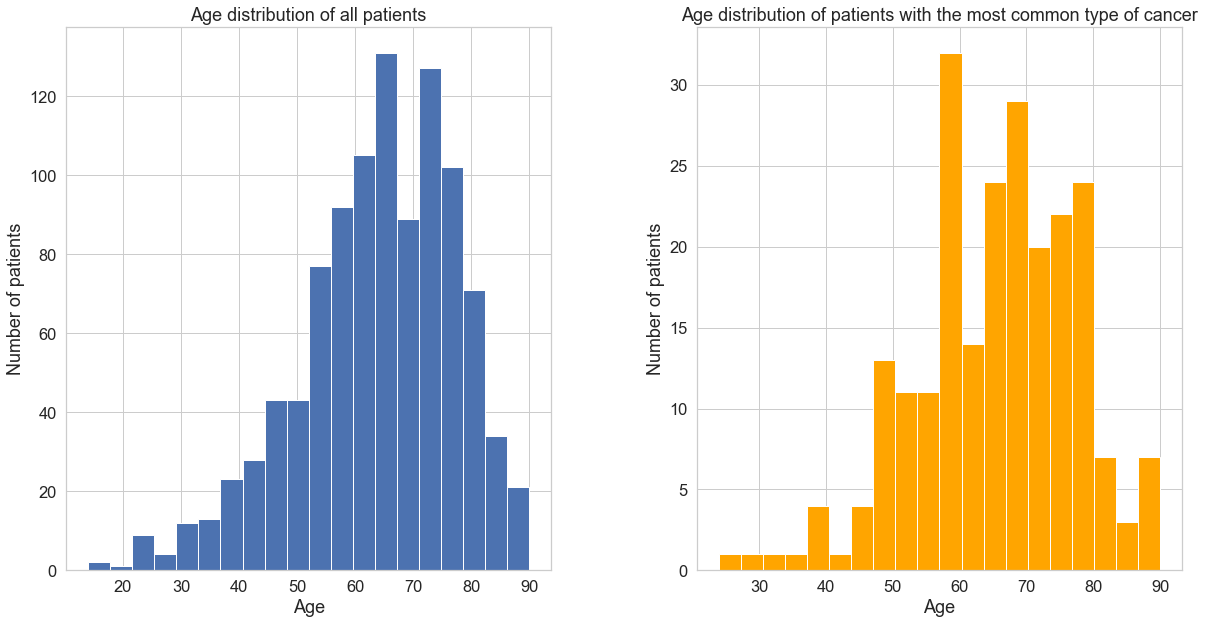

In [51]:
print(cancer['primary_diagnosis'].value_counts())


fig, ax = plt.subplots(1,2, figsize=(20, 10))

cancer.hist(column='age_at_index', bins=20, ax=ax[0])
#set x-axis, y-axis label and title for the first subplot (ax[0])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of patients')
ax[0].set_title('Age distribution of all patients')

cancer[cancer['primary_diagnosis'] == cancer['primary_diagnosis'].value_counts().head(1).index[0]].age_at_index.hist(bins=20, color='orange', label='Primary diagnosis', ax=ax[1])
#set x-axis, y-axis label and title for the second subplot (ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of patients')
ax[1].set_title("Age distribution of patients with the most common type of cancer")

plt.show()

## Soru A.5 (2p):
* Kanserin teşhis yaşı (age_at_diagnosis) ile hastanın kalan ömrü (days_to_death) arasındaki ilişkiyi gösteren bir saçılım grafiği çiziniz.

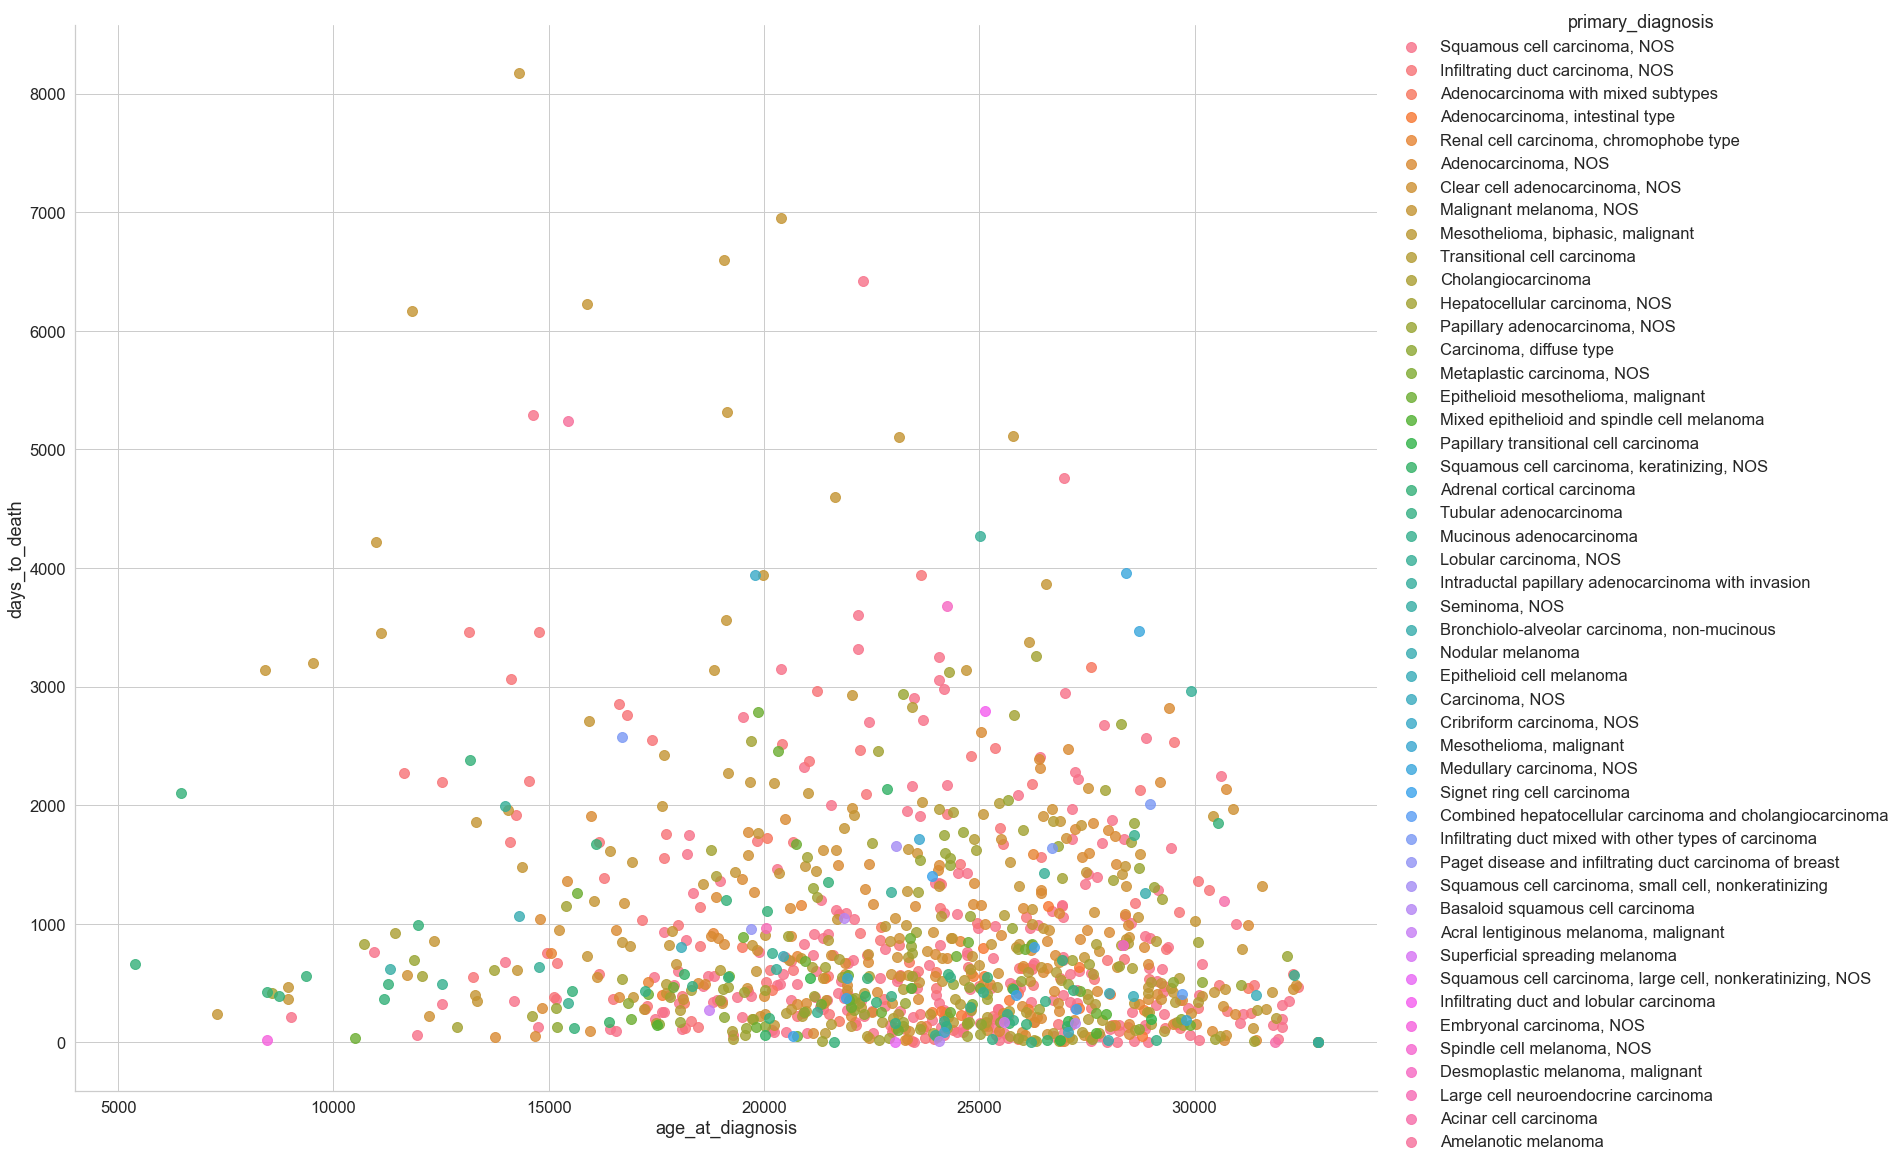

In [52]:
# plot scatter plot for the relationship between the age at diagnosis of cancer and the patient's remaining life span (days_to_death) in the cancer dataset.

sns.set(style="whitegrid", color_codes=True, font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.lmplot(x="age_at_diagnosis", y="days_to_death", data=cancer, hue="primary_diagnosis", fit_reg=False, scatter_kws={"s": 100}, height=16.00, aspect=15/12)
#Enlarge the scatters a little bit to make them more visible
plt.show()


## Soru A.6 (7p):
* Kanser hastalarının alkol ve sigara kullanımlarına ilişkin veriler içeren "exposure.tsv" dosyasını, 'case_submitter_id' sütunu index olacak şekilde ```exposure``` adlı DataFrame'e okuyunuz. ("'--" ve "Not Reported" değerlerinin ```NaN``` olacak şekilde okunmasını sağlayınız.)
* Tüm değerleri ```NaN``` olan sütunları siliniz.
* Sütunlarından herhangi birisinde ```NaN``` değeri olan satırları siliniz.
* Oluşan DataFrame'in satır ve sütun sayısını yazdırınız.
* 'cancer' ve 'exposure' adlı DataFrame'lerde ortak olan hastaların verilerini, hasta barkodu (case_submitter_id) aracılığıyla birleştiriniz ve 'cancer_exposure' adlı yeni bir dataframe'e aktarınız.

In [53]:
exposure = pd.read_csv('exposure.tsv', sep='\t', index_col='case_submitter_id', header = 0, na_values=["'--", "Not Reported", "not reported"])
#Delete all columns with NaN values.
exposure.dropna(axis=1, how='all', inplace=True)
#Delete all rows with NaN values.
exposure.dropna(axis=0, how='any', inplace=True)
#Print the number of rows and columns of the last DataFrame.
print("Number of rows:", exposure.shape[0])
print("Number of columns:", exposure.shape[1])
# Merge the 'cancer' and 'exposure' DataFrames.
cancer_exposure = pd.merge(cancer, exposure, how='inner', on='case_submitter_id')
# print nan values in the merged DataFrame.
cancer_exposure

Number of rows: 136
Number of columns: 6


,age_at_index,days_to_death,gender,race,vital_status,year_of_birth,year_of_death,age_at_diagnosis,ajcc_pathologic_stage,icd_10_code,...,synchronous_malignancy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_type,case_id,project_id,alcohol_history,cigarettes_per_day,pack_years_smoked,years_smoked
case_submitter_id,,,,,,,,,,,,,,,,,,,,,
TCGA-CV-7097,53.0,385.0,male,white,Dead,1949.0,2003.0,19382.0,Stage II,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",2002.0,"Radiation Therapy, NOS",9d0f5938-6a01-4c06-8536-dff834f7f2f9,TCGA-HNSC,Yes,3.506849,64.00,32.0
TCGA-CV-6961,61.0,76.0,male,white,Dead,1938.0,1999.0,22532.0,Stage II,C02.9,...,No,"Tongue, NOS",1999.0,"Radiation Therapy, NOS",4075717b-2240-4842-a00a-0c4dbcb910c4,TCGA-HNSC,Yes,3.616438,66.00,33.0
TCGA-CV-A45Y,61.0,2703.0,male,american indian or alaska native,Dead,1939.0,2007.0,22442.0,Stage IVA,C32.9,...,No,"Larynx, NOS",2000.0,"Radiation Therapy, NOS",468061c2-0acb-4f67-a357-99ccbd81a8b7,TCGA-HNSC,Yes,2.136986,39.00,39.0
TCGA-CV-7568,48.0,927.0,female,white,Dead,1947.0,1997.0,17670.0,Stage IVA,C14.8,...,No,"Overlapping lesion of lip, oral cavity and pha...",1995.0,"Pharmaceutical Therapy, NOS",fa2d4258-3ee4-4d53-8ef2-9700b5cf38d6,TCGA-HNSC,No,1.917808,35.00,35.0
TCGA-CQ-5325,65.0,654.0,male,white,Dead,1942.0,2008.0,23833.0,Stage I,C02.9,...,No,"Tongue, NOS",2007.0,"Radiation Therapy, NOS",408c5d54-7888-4955-8386-bf8819b48a6c,TCGA-HNSC,Yes,2.684932,49.00,49.0
TCGA-3A-A9IB,69.0,224.0,female,white,Dead,1942.0,2011.0,25312.0,Stage IIB,C25.0,...,No,Head of pancreas,2011.0,"Radiation Therapy, NOS",3cbf56e6-dccc-40fe-b06e-2621a2121e9d,TCGA-PAAD,No,0.273973,5.00,20.0
TCGA-P3-A6SX,67.0,1430.0,male,white,Dead,1938.0,2008.0,24715.0,Stage III,C09.9,...,No,"Tonsil, NOS",2005.0,"Radiation Therapy, NOS",220d75ae-c94b-473a-a988-ac40c15fa219,TCGA-HNSC,Yes,5.479452,100.00,50.0
TCGA-CN-5367,60.0,352.0,female,white,Dead,1946.0,2006.0,22246.0,Stage IVA,C02.9,...,No,"Tongue, NOS",2006.0,"Radiation Therapy, NOS",61d0709c-d148-413b-a7b5-c0c82ed2f32f,TCGA-HNSC,Yes,2.191781,40.00,40.0
TCGA-CQ-A4C7,88.0,353.0,male,white,Dead,1922.0,2010.0,32194.0,Stage III,C04.9,...,No,"Floor of mouth, NOS",2010.0,"Radiation Therapy, NOS",134223bd-5c03-4854-a034-ebd2c527833e,TCGA-HNSC,Yes,1.369863,25.00,25.0


## Soru A.7 (7p):

Alkol geçmişi olan ve günde 3'ten fazla sigara içen hastalarda, kanserin ilk ortaya çıktığı doku veya organların yüzdelerini pasta grafiği üzerinde gösteriniz.

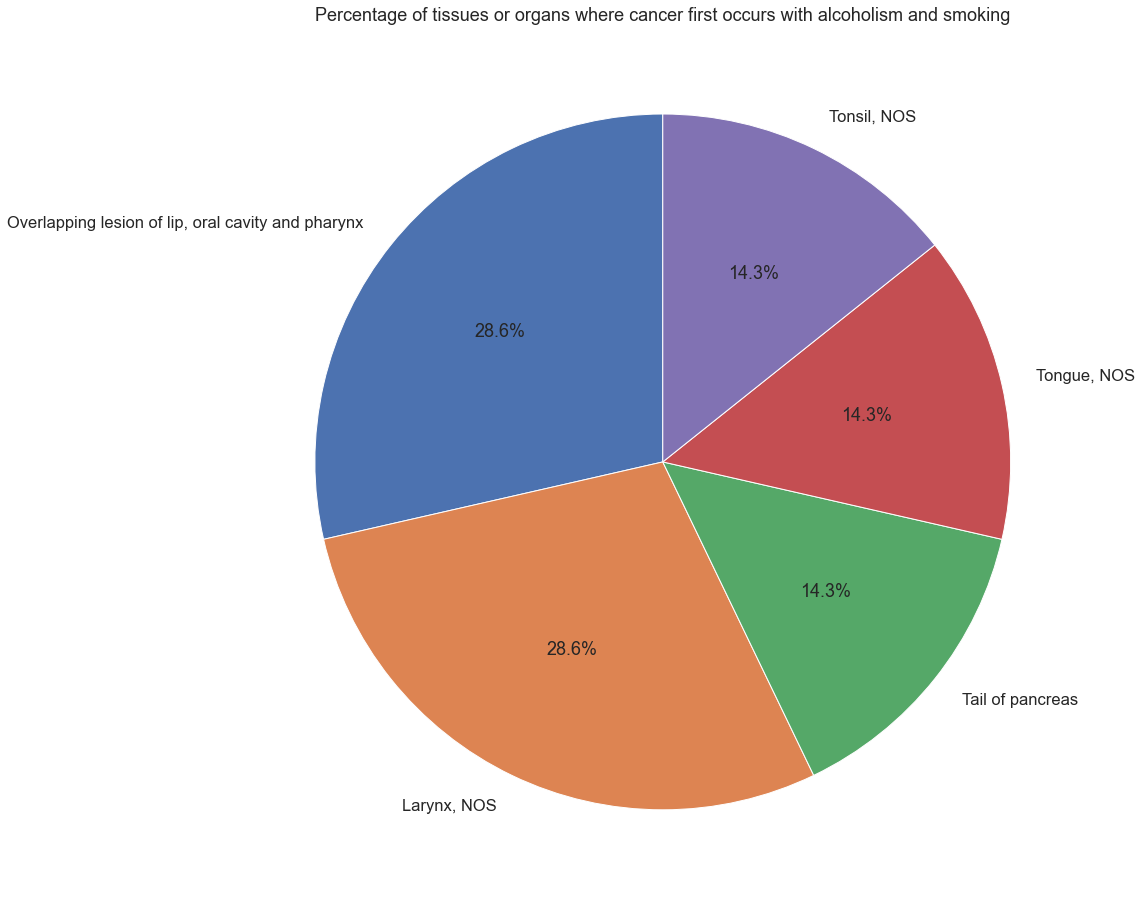

In [54]:
pie, ax = plt.subplots(figsize=[20,16])
# Create a new DataFrame with the percentage of tissues or organs where cancer first occurs. alcohol_history should be yes and cigarettes_per_day should be greater than 3.
alcohol_history = cancer_exposure[(cancer_exposure['alcohol_history'] == 'Yes') & (cancer_exposure['cigarettes_per_day'] > 3)]
# Calculate the percentage of tissues or organs where cancer first occurs.
percentage = alcohol_history['tissue_or_organ_of_origin'].value_counts(normalize=True) * 100
# Create a pie chart with the percentage of tissues or organs where cancer first occurs.
ax.pie(percentage, labels=percentage.index, autopct='%1.1f%%', startangle=90)
# Set the title of the pie chart.
ax.set_title('Percentage of tissues or organs where cancer first occurs with alcoholism and smoking')
# Show the pie chart.
plt.show()

# B.  Scikit-learn ile Makine Öğrenmesi (55 puan)
---

**Açıklamalar:**
* Bu bölümde A.1 sorusunda elde edilen DataFrame ('cancer') kullanılacaktır. 
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları 'one-hot encoding' yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  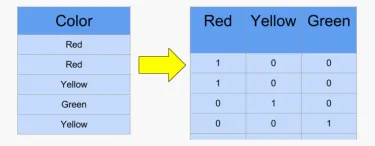
  3. Kategorik olmayan sütunlarda normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise 'k-fold cross-validation' ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hiper-parametre aramasını (hyper-parameter tunning) 'k-fold cross-validation' ile yapınız (GridSearchCV modülünü kullanabilirsiniz) ve test verisi üzerinde probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

## Soru B.1: Bir hastanın kaç gün ömrü kaldığının (days_to_death) tahminlenmesi (25p)

In [55]:
# select the columns in cancer dataframe, which are not 'vital_status', 'year_of_birth', 'year_of_death',
cancer_stored = cancer.copy()
cancer = cancer.drop(['vital_status', 'year_of_death', 'year_of_birth'], axis=1)

In [56]:
#one-hot encoding of categorical columns in cancer.
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
# fit the scaler to the cancer numerical columns.
for columns in cancer.columns:
    if cancer[columns].dtype != 'object' and columns != 'days_to_death':
        cancer[columns] = scaler.fit_transform(cancer[columns].values.reshape(-1, 1))

for columns in cancer.columns:
    if cancer[columns].dtype == 'object' and columns != 'days_to_death':
        cancer = pd.get_dummies(cancer, columns=[columns])


In [57]:
import numpy as np
from sklearn.experimental import enable_halving_search_cv
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingRandomSearchCV
from sklearn.linear_model import Lasso
from sklearn.utils import shuffle

# split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(cancer.drop('days_to_death', axis=1), cancer['days_to_death'], test_size=0.1, random_state=0)
X_train, y_train = shuffle(X_train, y_train, random_state=0)
# create a pipeline for the data. and lasso parameters are alpha=0.015, fit_intercept=False, tol=0.00000000000001,max_iter=10000000000000, positive=True tol=0.00000000000001, max_iter=1000000000 ,
pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.015, fit_intercept=True,  positive=False))])
# create a dictionary of parameters to search over.
param_grid = {'lasso__alpha': np.arange(1,10,0.015), 'lasso__max_iter': [100,1000,100], 'lasso__tol':np.arange(1e-6,0.1,1e-2), 'lasso__random_state': [0],  'lasso__selection': ['random', 'cyclic'], 'lasso__copy_X': [True, False], 'lasso__warm_start': [True, False]} #
# create a grid search object.
grid = HalvingRandomSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1, n_candidates="exhaust", factor=4, verbose=1) #
# fit the grid search object to the training data.
grid.fit(X_train, y_train)


n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 10
max_resources_: 924
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 92
n_resources: 10
Fitting 5 folds for each of 92 candidates, totalling 460 fits


C:\Users\simur\anaconda3\envs\general_purpose\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


----------
iter: 1
n_candidates: 23
n_resources: 40
Fitting 5 folds for each of 23 candidates, totalling 115 fits


C:\Users\simur\anaconda3\envs\general_purpose\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         

----------
iter: 2
n_candidates: 6
n_resources: 160
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 640
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingRandomSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                ('lasso', Lasso(alpha=0.015))]),
                      factor=4, n_jobs=-1,
                      param_distributions={'lasso__alpha': array([1.   , 1.015, 1.03 , 1.045, 1.06 , 1.075, 1.09 , 1.105, 1.12 ,
       1.135, 1.15 , 1.165, 1.18 , 1.195, 1.21 , 1.225, 1.24 , 1.255,
       1.27 , 1.285, 1.3  , 1.315, 1.33 , 1.345, 1.36 , 1.375, 1.39 ,
       1.405, 1.42 , 1.435, 1.45 , 1.465, 1.48 , 1.4...
       9.91 , 9.925, 9.94 , 9.955, 9.97 , 9.985]),
                                           'lasso__copy_X': [True, False],
                                           'lasso__max_iter': [100, 1000, 100],
                                           'lasso__random_state': [0],
                                           'lasso__selection': ['random',
                                                                'cyclic'],
                                           'las

In [58]:
# halvinggridsearchCV more faster than grid searchCV and this part running nearly 30 or 40 minute that's why I'm commenting this part. but if u have time u can try this type too

'''
# split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(cancer.drop('days_to_death', axis=1), cancer['days_to_death'], test_size=0.1, random_state=0)
X_train, y_train = shuffle(X_train, y_train, random_state=0)
# create a pipeline for the data. and lasso parameters are alpha=0.015, fit_intercept=False, tol=0.00000000000001,max_iter=10000000000000, positive=True tol=0.00000000000001, max_iter=1000000000 ,
pipe = Pipeline([('scaler', StandardScaler()), ('lasso', Lasso(alpha=0.015, fit_intercept=True,  positive=False))])
# create a dictionary of parameters to search over.
param_grid = {'lasso__alpha': np.arange(1,10,0.015), 'lasso__max_iter': [100,1000,100], 'lasso__tol':np.arange(1e-6,0.1,1e-2), 'lasso__random_state': [0],  'lasso__selection': ['random', 'cyclic']} # 'lasso__copy_X': [True, False], 'lasso__warm_start': [True, False],
# create a grid search object.
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1) #
# fit the grid search object to the training data.
grid.fit(X_train, y_train)
'''


'\n# split the data into training and test sets.\nX_train, X_test, y_train, y_test = train_test_split(cancer.drop(\'days_to_death\', axis=1), cancer[\'days_to_death\'], test_size=0.1, random_state=0)\nX_train, y_train = shuffle(X_train, y_train, random_state=0)\n# create a pipeline for the data. and lasso parameters are alpha=0.015, fit_intercept=False, tol=0.00000000000001,max_iter=10000000000000, positive=True tol=0.00000000000001, max_iter=1000000000 ,\npipe = Pipeline([(\'scaler\', StandardScaler()), (\'lasso\', Lasso(alpha=0.015, fit_intercept=True,  positive=False))])\n# create a dictionary of parameters to search over.\nparam_grid = {\'lasso__alpha\': np.arange(1,10,0.015), \'lasso__max_iter\': [100,1000,100], \'lasso__tol\':np.arange(1e-6,0.1,1e-2), \'lasso__random_state\': [0],  \'lasso__selection\': [\'random\', \'cyclic\']} # \'lasso__copy_X\': [True, False], \'lasso__warm_start\': [True, False],\n# create a grid search object.\ngrid = GridSearchCV(pipe, param_grid, cv=5, sc

In [59]:
grid.best_params_

{'lasso__warm_start': True,
 'lasso__tol': 0.080001,
 'lasso__selection': 'cyclic',
 'lasso__random_state': 0,
 'lasso__max_iter': 100,
 'lasso__copy_X': False,
 'lasso__alpha': 9.564999999999944}

In [60]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
print(mse)
print(best_model.score(X_test, y_test)) #-0.611 just 1e-6 ----- 0.16 ----- 0.43 ture false----- 0.4379754083573587 ----- 0.449 without copy_X and warm_start -----

642361.2954937826
0.43863694485791305


In [61]:
#r2 score of the best model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.43863694485791305

In [62]:
coefficients = grid.best_estimator_.named_steps['lasso'].coef_
importance = np.abs(coefficients)
importance

array([5.59997800e+01, 0.00000000e+00, 4.43369792e+02, 1.33222562e+01,
       1.96860325e-15, 4.45708437e+01, 2.45383004e+01, 0.00000000e+00,
       2.02456505e+01, 3.35019544e+00, 8.75844333e+01, 7.60505785e+01,
       5.15173302e+01, 5.27976072e+01, 0.00000000e+00, 2.93137224e+01,
       2.83940360e+01, 1.59978356e+01, 4.84801902e+00, 1.93075558e+01,
       1.59093908e+01, 4.34372598e+01, 0.00000000e+00, 4.16905710e+01,
       4.50516539e+01, 9.15004659e+00, 1.17502702e+01, 0.00000000e+00,
       1.87562941e+01, 6.45412266e+01, 0.00000000e+00, 3.28384506e+00,
       1.11732351e+01, 3.92756507e+00, 0.00000000e+00, 2.93809464e+00,
       0.00000000e+00, 0.00000000e+00, 1.39688038e+01, 8.99316223e-01,
       2.86237559e-01, 3.62174838e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.58044975e+00, 0.00000000e+00, 5.52491066e+01,
       1.44125802e+01, 1.68787124e+01, 0.00000000e+00, 1.14779321e+01,
       7.27584701e+00, 1.03154495e+01, 5.09924922e-01, 0.00000000e+00,
      

In [63]:
features = cancer.drop('days_to_death', axis=1).columns
np.array(features)[importance > 0]

array(['age_at_index', 'year_of_diagnosis', 'gender_female',
       'gender_male', 'race_american indian or alaska native',
       'race_asian', 'race_native hawaiian or other pacific islander',
       'race_white', 'ajcc_pathologic_stage_Stage 0',
       'ajcc_pathologic_stage_Stage I', 'ajcc_pathologic_stage_Stage IA',
       'ajcc_pathologic_stage_Stage IB',
       'ajcc_pathologic_stage_Stage IIA',
       'ajcc_pathologic_stage_Stage IIB',
       'ajcc_pathologic_stage_Stage IIC',
       'ajcc_pathologic_stage_Stage III',
       'ajcc_pathologic_stage_Stage IIIA',
       'ajcc_pathologic_stage_Stage IIIB',
       'ajcc_pathologic_stage_Stage IIIC',
       'ajcc_pathologic_stage_Stage IV',
       'ajcc_pathologic_stage_Stage IVA',
       'ajcc_pathologic_stage_Stage IVB',
       'ajcc_pathologic_stage_Stage IVC', 'icd_10_code_C01',
       'icd_10_code_C02.9', 'icd_10_code_C03.1', 'icd_10_code_C04.9',
       'icd_10_code_C05.0', 'icd_10_code_C06.9', 'icd_10_code_C14.8',
       'icd_1

In [64]:
np.array(features)[importance == 0]

array(['age_at_diagnosis', 'race_black or african american',
       'ajcc_pathologic_stage_Stage II', 'ajcc_pathologic_stage_Stage IS',
       'ajcc_pathologic_stage_Stage X', 'icd_10_code_C03.0',
       'icd_10_code_C06.0', 'icd_10_code_C09.9', 'icd_10_code_C13.9',
       'icd_10_code_C16.0', 'icd_10_code_C16.1', 'icd_10_code_C16.2',
       'icd_10_code_C16.9', 'icd_10_code_C18.4', 'icd_10_code_C20',
       'icd_10_code_C22.0', 'icd_10_code_C25.0', 'icd_10_code_C25.1',
       'icd_10_code_C25.9', 'icd_10_code_C32.9', 'icd_10_code_C34.3',
       'icd_10_code_C34.30', 'icd_10_code_C34.8', 'icd_10_code_C44.5',
       'icd_10_code_C44.7', 'icd_10_code_C45.0', 'icd_10_code_C49.1',
       'icd_10_code_C49.2', 'icd_10_code_C49.4', 'icd_10_code_C49.9',
       'icd_10_code_C51.9', 'icd_10_code_C62.9', 'icd_10_code_C62.90',
       'icd_10_code_C64.1', 'icd_10_code_C64.9', 'icd_10_code_C67.1',
       'icd_10_code_C67.2', 'icd_10_code_C67.4', 'icd_10_code_C67.5',
       'icd_10_code_C69.80', 'icd

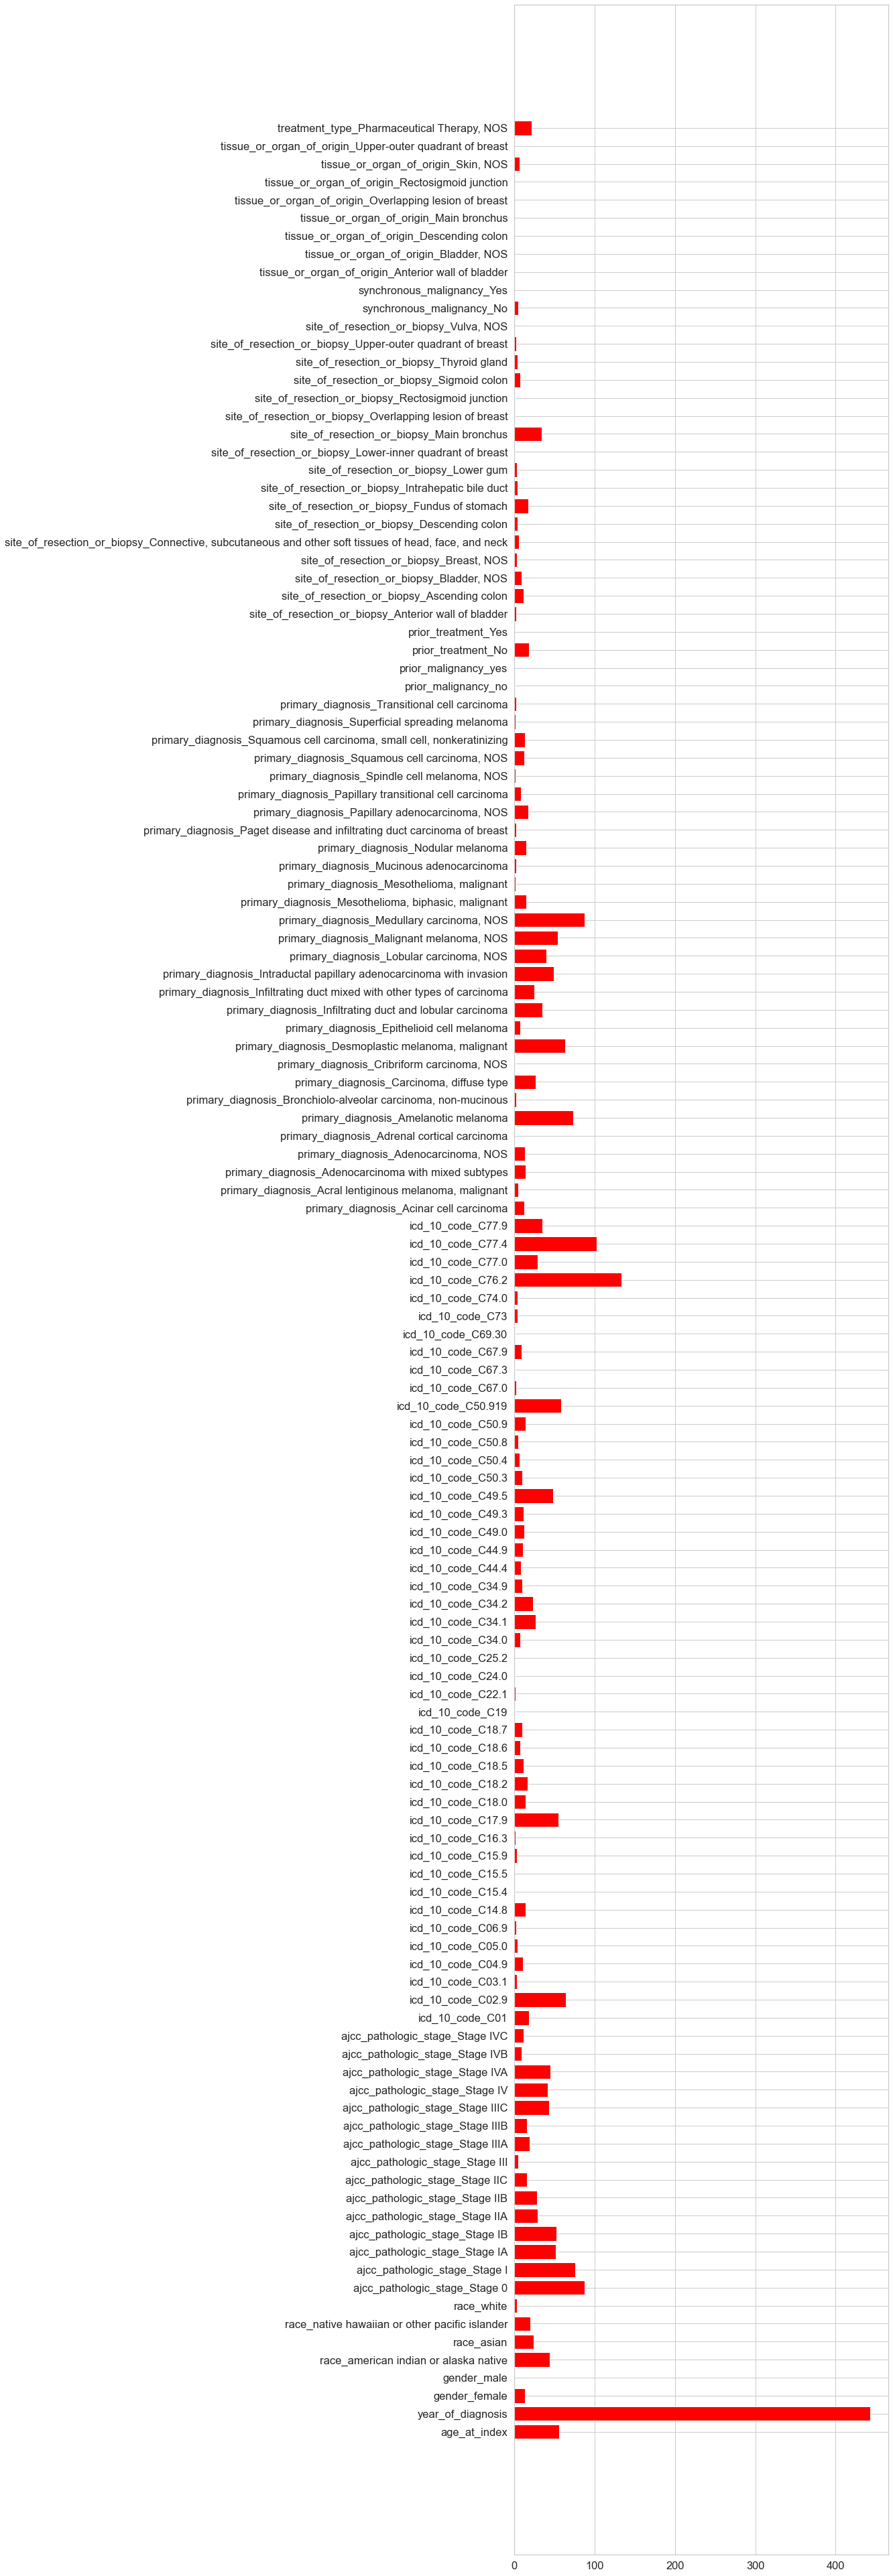

640445.2026257884
0.440311428912072


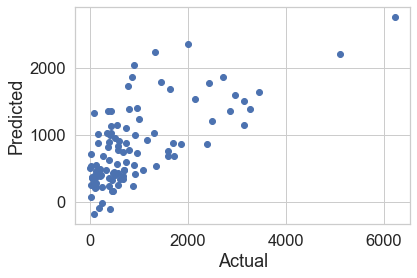

In [65]:
#plot the coefficients of the Lasso model. The coefficients with a magnitude greater than 0 are plotted in red. The coefficients with a magnitude less than 0 are plotted in blue. The coefficients with a magnitude equal to 0 are plotted in green.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 70))
plt.barh(np.array(features)[importance > 0], importance[importance > 0], color='red')
plt.show()
#select best model from the GridSearchCV object. predict the test set and calculate the mean squared error. Print the mean squared error. Print the accuracy of the model.
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
print(mse)
print(best_model.score(X_test, y_test))
#plot the test set predictions vs actual values of days_to_death with a scatter plot.
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [66]:
coefficients = grid.best_estimator_.named_steps['lasso'].coef_
features = cancer.drop('days_to_death', axis=1).columns
importance = np.abs(coefficients)
importance_df = pd.DataFrame({'feature': features, 'importance': importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,feature,importance
2,year_of_diagnosis,440.601385
106,icd_10_code_C76.2,133.279556
109,icd_10_code_C77.4,100.167250
139,"primary_diagnosis_Medullary carcinoma, NOS",87.551855
10,ajcc_pathologic_stage_Stage 0,85.943785
...,...,...
169,site_of_resection_or_biopsy_Bladder neck,0.000000
171,site_of_resection_or_biopsy_Body of pancreas,0.000000
172,site_of_resection_or_biopsy_Body of stomach,0.000000
174,"site_of_resection_or_biopsy_Cardia, NOS",0.000000


In [67]:
#print the best score.
print(grid.best_score_)
#print the best parameters.
print(grid.best_params_)
#print the best estimator.
print(grid.best_estimator_)


0.27218190029561634
{'lasso__warm_start': True, 'lasso__tol': 0.080001, 'lasso__selection': 'cyclic', 'lasso__random_state': 0, 'lasso__max_iter': 100, 'lasso__copy_X': False, 'lasso__alpha': 9.564999999999944}
Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=9.564999999999944, copy_X=False, max_iter=100,
                       random_state=0, tol=0.080001, warm_start=True))])


In [68]:
# print the best parameters and the corresponding score.
print('Best parameters found on training set:', grid.best_params_)
print('Best score found on training set:', grid.best_score_)
#get features with coefficients. get importance of features.
coef = grid.best_estimator_.named_steps['lasso'].coef_
coef

Best parameters found on training set: {'lasso__warm_start': True, 'lasso__tol': 0.080001, 'lasso__selection': 'cyclic', 'lasso__random_state': 0, 'lasso__max_iter': 100, 'lasso__copy_X': False, 'lasso__alpha': 9.564999999999944}
Best score found on training set: 0.27218190029561634


array([-5.48238777e+01, -9.53809392e-05, -4.40601385e+02, -1.37198510e+01,
        1.57488260e-14,  4.44163888e+01, -2.35926960e+01, -0.00000000e+00,
       -2.01322463e+01,  3.68280878e+00,  8.59437847e+01,  7.33099709e+01,
        4.90042991e+01,  4.86732596e+01,  0.00000000e+00,  2.60804958e+01,
        2.57112903e+01, -1.79374804e+01, -5.87069688e+00,  1.56512847e+01,
       -1.80787217e+01, -4.62659806e+01,  0.00000000e+00, -4.32612343e+01,
       -4.40378082e+01, -8.84839925e+00,  1.17508426e+01, -0.00000000e+00,
       -1.81174694e+01, -6.29300876e+01, -0.00000000e+00,  2.71215793e+00,
       -1.04369440e+01, -3.82728676e+00, -0.00000000e+00, -2.70157450e+00,
       -0.00000000e+00,  0.00000000e+00, -1.22031804e+01, -1.48329829e-01,
       -0.00000000e+00, -3.18133005e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.92227596e+00, -0.00000000e+00,  5.43103268e+01,
       -1.34915969e+01, -1.24000022e+01,  0.00000000e+00, -1.08473928e+01,
        7.40247066e+00,  

## Soru B.2: Bir hastaya uygulanan tedavi yönteminin (treatment_type) tahminlenmesi (30p)

In [69]:
# select the columns in cancer dataframe, which are not 'vital_status', 'age_at_diagnosis', 'prior_treatment', 'year_of_death', 'year_of_death',
cancer = cancer_stored.drop(['year_of_birth', 'year_of_death'], axis=1)

In [70]:
#one-hot encoding of categorical columns in cancer.
import sklearn.preprocessing as preprocessing

scaler = preprocessing.StandardScaler()
# fit the scaler to the cancer numerical columns.
for columns in cancer.columns:
    if cancer[columns].dtype != 'object' and columns != 'treatment_type':
        cancer[columns] = scaler.fit_transform(cancer[columns].values.reshape(-1, 1))

for columns in cancer.columns:
    if cancer[columns].dtype == 'object' and columns != 'treatment_type':
        cancer = pd.get_dummies(cancer, columns=[columns])


In [71]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Init the classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic", verbose=None, seed=1121218)

# Create train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    cancer.drop('treatment_type', axis=1), cancer['treatment_type'], test_size=0.2, random_state=1121218, stratify=cancer['treatment_type']
)

# Fit
_ = xgb_cl.fit(X_train, y_train)


# Predict
preds = xgb_cl.predict(X_test)

[07:27:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\simur\anaconda3\envs\general_purpose\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [72]:

# print test and preds dataframe
pd.DataFrame({'y_test': y_test, 'preds': preds})

,y_test,preds
case_submitter_id,,
TCGA-CN-4726,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-ES-A2HT,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-22-5481,"Radiation Therapy, NOS","Radiation Therapy, NOS"
TCGA-2Y-A9GW,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-46-3768,"Pharmaceutical Therapy, NOS","Pharmaceutical Therapy, NOS"
...,...,...
TCGA-XF-A9SU,"Pharmaceutical Therapy, NOS","Radiation Therapy, NOS"
TCGA-B6-A0X5,"Pharmaceutical Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-IB-7654,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"


In [73]:
pipe = Pipeline([('scaler', StandardScaler()), ('xgb', xgb_cl)])

In [74]:
param_grid_2 = {
    "max_depth": [3, 4, 5],
    "gamma": [5, 30, 50],
    "learning_rate": [0.01, 0.1, 0.3, 0.5],
    "min_child_weight": [1, 3, 5],
    "reg_lambda": [50, 100, 300],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
}

In [75]:
halving_random_cv = HalvingRandomSearchCV(
    xgb_cl, param_grid_2, scoring='f1_micro', n_jobs=-1, n_candidates="exhaust", factor=4, cv=10, verbose=1
)

_ = halving_random_cv.fit(X_train,y_train)


halving_random_cv.best_score_

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 40
max_resources_: 821
aggressive_elimination: False
factor: 4
----------
iter: 0
n_candidates: 20
n_resources: 40
Fitting 10 folds for each of 20 candidates, totalling 200 fits
----------
iter: 1
n_candidates: 5
n_resources: 160
Fitting 10 folds for each of 5 candidates, totalling 50 fits
----------
iter: 2
n_candidates: 2
n_resources: 640
Fitting 10 folds for each of 2 candidates, totalling 20 fits


C:\Users\simur\anaconda3\envs\general_purpose\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:28:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5086557539682539

In [77]:
# print the best parameters and the corresponding score.
print('Best parameters found on training set:', halving_random_cv.best_params_)
print('Best score found on training set:', halving_random_cv.best_score_)
#print the best estimator.
print(halving_random_cv.best_estimator_)
#print roc auc score. print accuracy of the model.
print(halving_random_cv.best_estimator_.score(X_test, y_test))


Best parameters found on training set: {'subsample': 0.7, 'reg_lambda': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 50, 'colsample_bytree': 0.8}
Best score found on training set: 0.5086557539682539
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=50, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=1121218, reg_alpha=0,
              reg_lambda=100, scale_pos_weight=1, seed=1121218, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbose=None,
              verbosity=None)
0.5048543689320388


In [83]:
#predict the test set and calculate accuracy of the model.
from sklearn.metrics import accuracy_score
preds = halving_random_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test, preds))
#create a confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

0.529126213592233


array([[109,   0],
       [ 97,   0]], dtype=int64)

In [84]:
pd.DataFrame({'y_test': y_test, 'preds': preds})

,y_test,preds
case_submitter_id,,
TCGA-CV-6945,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-DD-A3A0,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-D3-A2J7,"Pharmaceutical Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-AO-A03O,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-33-AASI,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"
...,...,...
TCGA-CV-6950,"Pharmaceutical Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-78-7145,"Pharmaceutical Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-98-8020,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"


In [87]:
# alternative way for the halvinggridsearchCV, it is used above. this algorithmn take so much time. Complition time take more than 1.5 hour.
#Train model for predict treatment_type using grid search. The model is logistic regression.
#split the data into training and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.drop('treatment_type', axis=1), cancer['treatment_type'], test_size=0.2, random_state=0)
#shuffle the training set.
X_train, y_train = shuffle(X_train, y_train, random_state=0)
#create a pipeline object.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
#create a pipeline object.
pipeline = Pipeline([('model', LogisticRegression())])
#create a dictionary of hyperparameters to search.
parameters = { 'model__C':np.arange(0.1,10,0.1), 'model__penalty':['l1','l2'], 'model__solver':['liblinear','saga'], 'model__tol':[0.0001,0.001,0.01], 'model__class_weight':['balanced',None], 'model__random_state':[0], 'model__max_iter':[1000,10000,100000]}
#create a GridSearchCV object.
search = GridSearchCV(pipeline, parameters,
                        cv = 5, scoring="accuracy",verbose=1
                        )
search.fit(X_train,y_train)
#print the best score.
print(search.best_score_)
#print the best parameters.
print(search.best_params_)
#print the best estimator.
print(search.best_estimator_)
#accuracy
print(search.score(X_test,y_test))


Fitting 5 folds for each of 7128 candidates, totalling 35640 fits


0.5212786400591278
{'model__C': 0.8, 'model__class_weight': None, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__random_state': 0, 'model__solver': 'liblinear', 'model__tol': 0.0001}
Pipeline(steps=[('model',
                 LogisticRegression(C=0.8, max_iter=1000, penalty='l1',
                                    random_state=0, solver='liblinear'))])
0.5048543689320388


In [88]:
#print the best parameters and the corresponding score.
print('Best parameters found on training set:', search.best_params_)
print('Best score found on training set:', search.best_score_)
#get features with coefficients. get importance of features.
coef = search.best_estimator_.named_steps['model'].coef_
coef


Best parameters found on training set: {'model__C': 0.8, 'model__class_weight': None, 'model__max_iter': 1000, 'model__penalty': 'l1', 'model__random_state': 0, 'model__solver': 'liblinear', 'model__tol': 0.0001}
Best score found on training set: 0.5212786400591278


array([[ 0.00000000e+00,  5.68207173e-02, -1.32841426e-01,
         7.48537237e-02,  9.89115078e-02, -3.53229276e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -6.85570510e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         7.07592213e-02,  0.00000000e+00,  2.96003492e-01,
        -8.78341266e-02,  0.00000000e+00,  9.92554203e-02,
        -4.58362995e-01,  0.00000000e+00,  1.09888167e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.76119780e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.90130636e-02,  0.00000000e+00,
        -8.30962104e-01,  0.00000000e+00,  0.00000000e+00,
         3.15131762e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [101]:
#predict the treatment_type and print the accuracy.
y_pred = search.predict(X_test)
print(accuracy_score(y_test, y_pred))
#create a confusion matrix.
confusion_matrix(y_test, y_pred)

0.5048543689320388


array([[52, 57],
       [45, 52]], dtype=int64)

In [103]:
#create a dataframe of the y_pred and y_test.
pd.DataFrame({'test': y_test, 'pred': y_pred})

,y_test,y_pred
case_submitter_id,,
TCGA-CV-6945,"Radiation Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-DD-A3A0,"Radiation Therapy, NOS","Radiation Therapy, NOS"
TCGA-D3-A2J7,"Pharmaceutical Therapy, NOS","Radiation Therapy, NOS"
TCGA-AO-A03O,"Radiation Therapy, NOS","Radiation Therapy, NOS"
TCGA-33-AASI,"Radiation Therapy, NOS","Radiation Therapy, NOS"
...,...,...
TCGA-CV-6950,"Pharmaceutical Therapy, NOS","Pharmaceutical Therapy, NOS"
TCGA-78-7145,"Pharmaceutical Therapy, NOS","Radiation Therapy, NOS"
TCGA-98-8020,"Radiation Therapy, NOS","Radiation Therapy, NOS"


In [133]:
#show the features name with coefficients. get importance of features. get the features with the highest coefficients.
features = cancer.drop('treatment_type', axis=1).columns
coef = search.best_estimator_.named_steps['model'].coef_
#get the features with the highest coefficients.
coef_df = pd.DataFrame(coef, columns=features)
coef_df.T.sort_values(by=0, ascending=False)

,0
icd_10_code_C04.9,0.476120
prior_malignancy_yes,0.461280
"site_of_resection_or_biopsy_Lung, NOS",0.401880
primary_diagnosis_Transitional cell carcinoma,0.371773
"primary_diagnosis_Hepatocellular carcinoma, NOS",0.304219
...,...
icd_10_code_C25.0,-0.423824
ajcc_pathologic_stage_Stage IIIA,-0.458363
"primary_diagnosis_Epithelioid mesothelioma, malignant",-0.619303
icd_10_code_C15.5,-0.830962
